In [1]:
import numpy as np

# 실제 값, 예측 값(신경망의 결과 값)을 받음.
def binary_cross_entropy(y_true, y_pred):
  epsilon = 1e-15  # 소수점을 가지고 있는 데이터: 연산의 편리, 비교
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

  # log-loss 식 == Cross-Entropy 식
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
y_pred = np.array([0.9, 0.1, 0.8, 0.7, 0.2, 0.9, 0.4, 0.3, 0.85, 0.05])

loss = binary_cross_entropy(y_true, y_pred)
print(f"Binary Cross-Entropy Loss (Log-Loss): {loss:.4f}")

Binary Cross-Entropy Loss (Log-Loss): 0.2200


# Softmax

In [2]:
# softmax는 결과를 확률로 반환
# 신경망에서는 원핫인코딩 => 내부적으로 원핫인코딩 (범주형)
answer = [1.0, 0.0, 0.0]  # 3개로 분류

import numpy as np
scores = [3.0, 1.0, 0.2]  # 신경망의 분류 결과

# 나온 결과 값에 지수를 취함. 지수를 취하면 값의 범위가 넓어짐. -> 판단하기 쉬워짐.
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis = 0)

In [3]:
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [4]:
sum(softmax(scores))

0.9999999999999999

# Sigmoid 함수

 - 데이터를 0과 1(확률)사이의 값으로 맵핑

In [7]:
def sigmoid(inputs):
  sigmoid_scores = [1 / float(1 + np.exp(- x)) for x in inputs]
  return sigmoid_scores

sigmoid_inputs = [-200, 3, 5, 6, 10, 100, 1000, 10000]
sigmoid(sigmoid_inputs)

[1.3838965267367376e-87,
 0.9525741268224334,
 0.9933071490757153,
 0.9975273768433653,
 0.9999546021312976,
 1.0,
 1.0,
 1.0]

# 시각화

In [8]:
# 한글 지원이 안돼서 나눔폰트 설치
import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonts-nanum* -qq    # 나눔폰트
import matplotlib.font_manager as fm # 아래 위치에 저장됨(나눔고딕으로 저장함)
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', name='NanumBarunGothic')
fm.fontManager.ttflist.insert(0, fe) # fontManager에 ttf 파일 저장
# runtime Configuration
# 글자는 폰트 사이즈별로 폰트 이미지가 있어야함 -> font.family (이걸로 지정)


# plt rc 직접 지정
plt.rcParams.update({'font.size': 18, 'font.family':'NanumBarunGothic'})
plt.rc('figure', figsize =(10,10))
font_option = {'family':'NanumBarunGothic',
               'weight':'bold',
               'size':20}
plt.rc('font', **font_option)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

-1.0
-1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


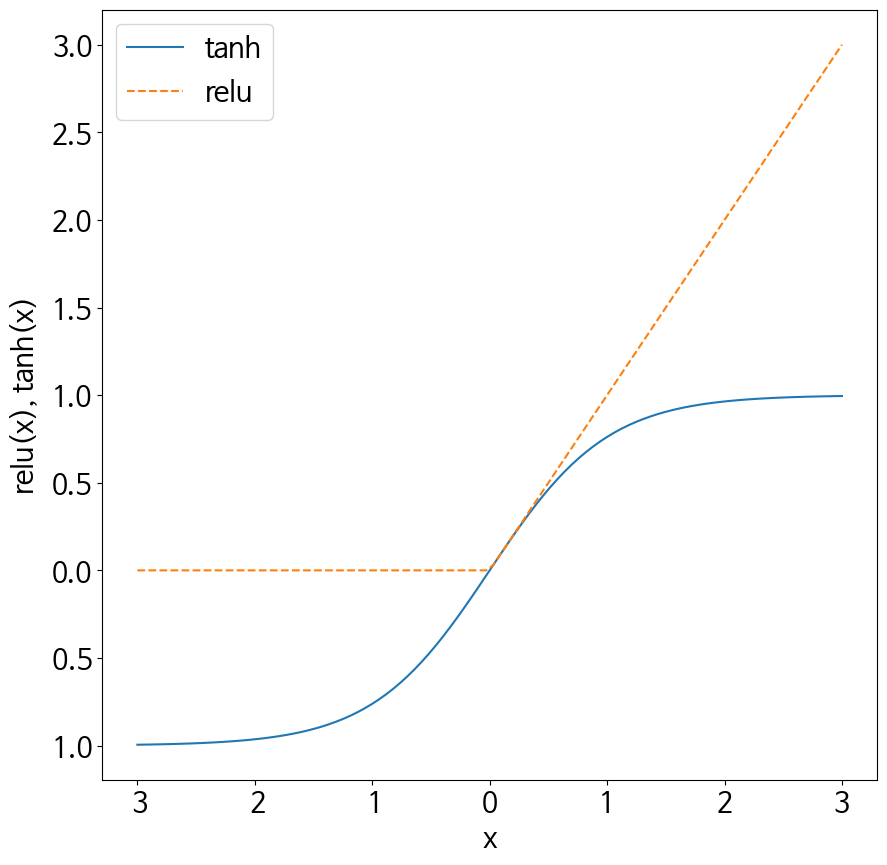

In [10]:
import matplotlib.pyplot as plt

line = np.linspace(-3, 3, 100)  # x축 값 결정  # -3, 3을 백 개로 나눔.
plt.plot(line, np.tanh(line), label = 'tanh')  # -1 ~ 1 사이의 값을 가짐.

# 0 ~ oo(무한대)
plt.plot(line, np.maximum(line, 0), linestyle = '--', label = 'relu')
plt.legend(loc = 'best')
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

print(np.tanh(-100))
print(np.tanh(-10000000000))

In [12]:
# 경계선 출력을 위해서
def plot_iris(X, y, model, title, xmin = -2.5, xmax = 2.5, ymin = -2.5, ymax = 2.5):
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin) / 1000),
                       np.arange(ymin, ymax, (ymax - ymin) / 1000))

  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T),
                  XX.shape)  # 백만개에 대한 접점 예측
  plt.contourf(XX, YY, ZZ, alpha = 0.5)

  # 데이터 출력 (이진 데이터 분류)
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0', s = 100)
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 's', label = '1', s = 100)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.xlabel("특성 0")
  plt.ylabel("특성 1")
  plt.title(title)
  plt.show()

### ANN: MLPClassifier(분류), MLPRegressor(예측), BernoulliRBM
  - 전부 비선형이다. 왜? Activation Function으로 다 비선형 mapping하니까

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


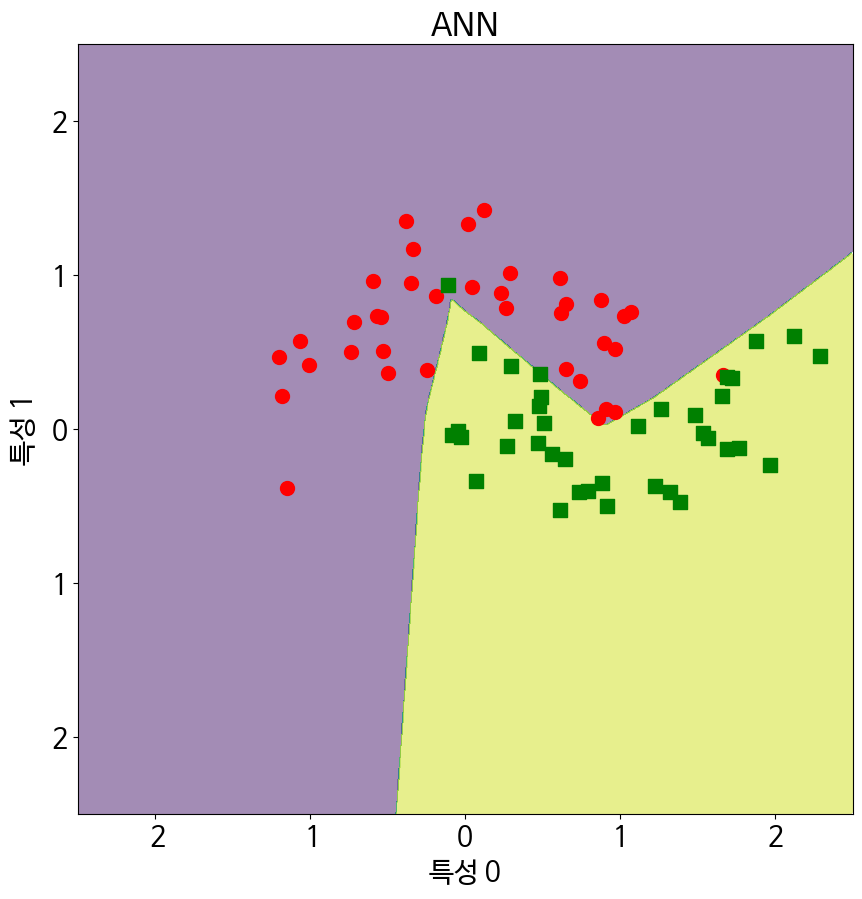

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

# max_iter: 반복횟수 ( = epoch(전체 데이터를 다 학습하는 것)라고 보면 됨.)
mlp = MLPClassifier(max_iter = 3000, random_state = 0).fit(X_train, y_train)
plot_iris(X_train, y_train, mlp, 'ANN')

###hidden_layer_sizes array-like of shape(n_layers - 2,), default=(100,)
 - hidden_layer_sizes: 나가는 차수 결정
 - 100 x 2 가중치 (데이터에 맞춰 2를 자동으로 결정)
   (2 자동 x 100) => 100 x 100
 - 신경망은 black box (bb)

In [14]:
mlp.coefs_   # 계수  # y = ax + b (bias)

# 뒤는 자동으로 계산해줌 ( 100 x 2 )

[array([[ 1.18946301e+00,  1.34747232e-01,  5.73557050e-01,
          1.00710489e+00,  2.09532517e-31,  2.01472084e-28,
          6.96371478e-02,  5.68851337e-01,  1.98026101e-01,
         -3.66772682e-03,  1.78040195e-01,  1.26119942e+00,
          9.58193342e-02,  1.04444731e-01, -1.70591285e-01,
         -8.24688156e-01, -1.19617279e+00,  9.35838109e-02,
          1.39939586e-01,  1.95086818e-01,  3.68891752e-01,
          1.30601596e-01,  9.57979798e-01,  2.08881880e-01,
         -1.20600052e+00, -8.57186619e-01,  1.20694310e-01,
          7.22189236e-01,  7.87493820e-02, -9.00864008e-01,
         -9.73783172e-01,  8.21631616e-01, -9.42348802e-01,
          1.63889296e-31, -1.67563151e-01,  6.54829944e-02,
          2.23655050e-02,  4.24298737e-01,  1.02757089e+00,
          1.65340307e-01,  7.52430105e-02,  5.14186806e-32,
          1.54761884e-01, -8.17593926e-01,  9.51947352e-02,
          3.07033383e-01, -1.46146332e+00, -9.54941630e-01,
         -4.24834308e-02, -1.17045197e-0

In [16]:
X.shape

(100, 2)

# 차수 조정

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


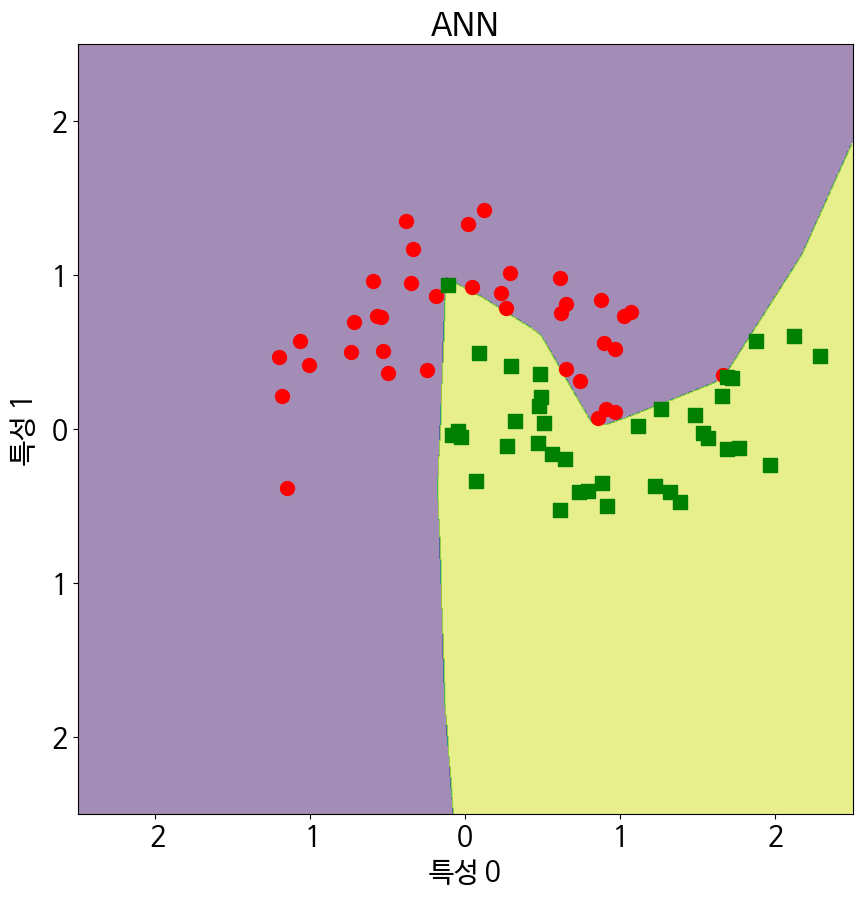

In [17]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[30, 10])  # 30: 나가는 차수
mlp.fit(X_train, y_train)

plot_iris(X_train, y_train, mlp, 'ANN')  # 100 x 2로 들어옴.
# 100 x 2   2 x 30  => 100 x 30   30 x 10   => 100 x 10 (10 x 1)  # 이진 분류일 땐 1.  =>  100 x 1

In [18]:
X_train.shape

(75, 2)

In [19]:
mlp.coefs_[0].shape

(2, 30)

In [20]:
mlp.coefs_[1].shape

(30, 10)

In [21]:
mlp.coefs_[2].shape  # 모델이 자동 결정

(10, 1)

In [27]:
# 경계선 출력을 위해서
def plot_multi(X, y, model, ax, title, xmin = -2.5, xmax = 2.5, ymin = -2.5, ymax = 2.5):
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin) / 1000),
                       np.arange(ymin, ymax, (ymax - ymin) / 1000))

  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T),
                  XX.shape)  # 백만개에 대한 접점 예측
  ax.contourf(XX, YY, ZZ, alpha = 0.5)

  # 데이터 출력 (이진 데이터 분류)
  ax.scatter(X[y == 0, 0], X[y == 0, 1], c = 'r', marker = 'o', label = '0', s = 100)
  ax.scatter(X[y == 1, 0], X[y == 1, 1], c = 'g', marker = 's', label = '1', s = 100)

  ax.set_xlim([xmin, xmax])
  ax.set_ylim([ymin, ymax])
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
  ax.set_title(title)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


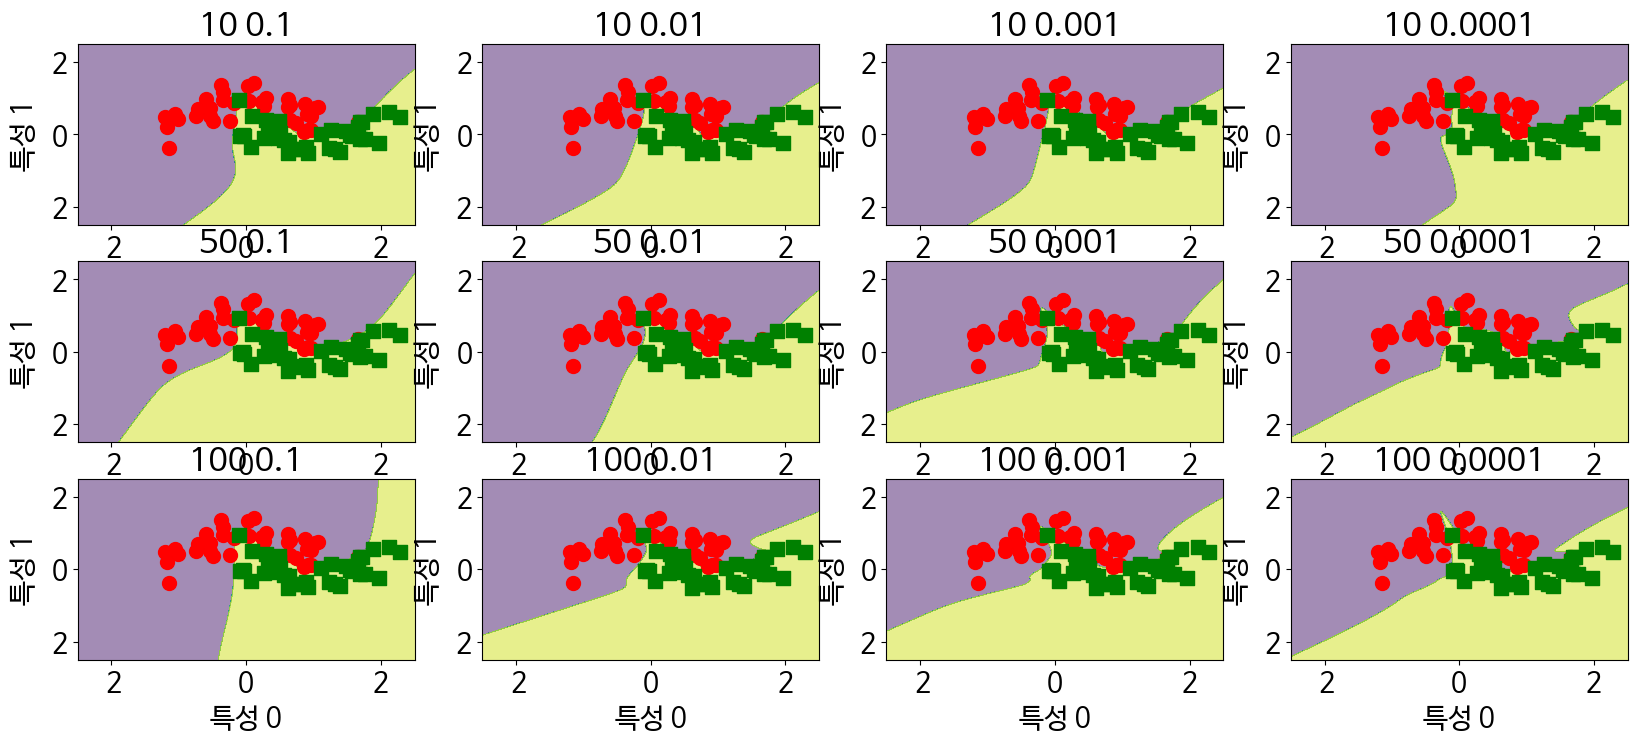

In [29]:
fig, axes = plt.subplots(3, 4, figsize = (20, 8))

# 75x2  2x10 10x10 10x1  (hidden node를 2개 줬으니까 10x10)
# 75x2 2x50 50x50 50x1로 결정
# 75x2 2x100 100x100 100x1에 거쳐서 결정
for axx, n_hidden_nodes in zip(axes, [10, 50, 100]):  # 가중치를 10, 50, 100으로 줬을 때의 차이
  # regularization (규제) (0.1, 0.01 ~)
  for ax, alpha in zip(axx, [0.1, 0.01, 0.001, 0.0001]):
    # default = 'relu'
    mlp = MLPClassifier(solver = 'lbfgs', random_state=0, activation='tanh', max_iter=1000,
                        hidden_layer_sizes = [n_hidden_nodes, n_hidden_nodes], alpha = alpha)

    mlp.fit(X_train, y_train)
    plot_multi(X_train, y_train, mlp, ax, str(n_hidden_nodes) + " " + str(alpha))

plt.show()

In [48]:
#  가중치 사이즈 늘린다? 특징 추출을 여러 번 한다. -> 여러 번 하면? 정밀해짐.

# Breast Cancer

In [30]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0
)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


### 문제 1

In [33]:
# 차수를 계산해보시오.

X_train.shape   # 426x30  30x100  100x1

(426, 30)

In [34]:
mlp.coefs_[0].shape

(30, 100)

In [35]:
mlp.coefs_[1].shape

(100, 1)

In [36]:
# 이 모델이 학습한 기본 파라미터들
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# 히든 레이어 사이즈 늘려보기

In [37]:
# -, 30  => 30x15 => 15x5 => 5x1

mlp = MLPClassifier(max_iter = 1000, alpha = 0.001, solver='sgd', activation='tanh', random_state=0, hidden_layer_sizes=[15, 5])

mlp.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(mlp.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.631
테스트 세트 정확도: 0.629


### 같은 상태에서 Z-점수 정규화 진행

In [39]:
mean_on_train = X_train.mean(axis = 0)
std_on_train = X_train.std(axis = 0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(max_iter = 1000, alpha = 0.001, solver = 'sgd', activation='tanh', random_state=0, hidden_layer_sizes=[15, 5])
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.986
테스트 세트 정확도: 0.958


In [40]:
mlp.classes_

array([0, 1])

In [41]:
mlp.loss_

0.07859636214999617

In [42]:
mlp.coefs_[0].shape   # y = ax + b

(30, 15)

### 절편(intercepts): 계수의 나가는 차수만큼 생성됨.

In [43]:
mlp.intercepts_[0].shape

(15,)

In [44]:
mlp.coefs_[0].shape

(30, 15)

### 이진분류의 마지막 activation 함수

In [45]:
print(mlp.out_activation_)

logistic


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


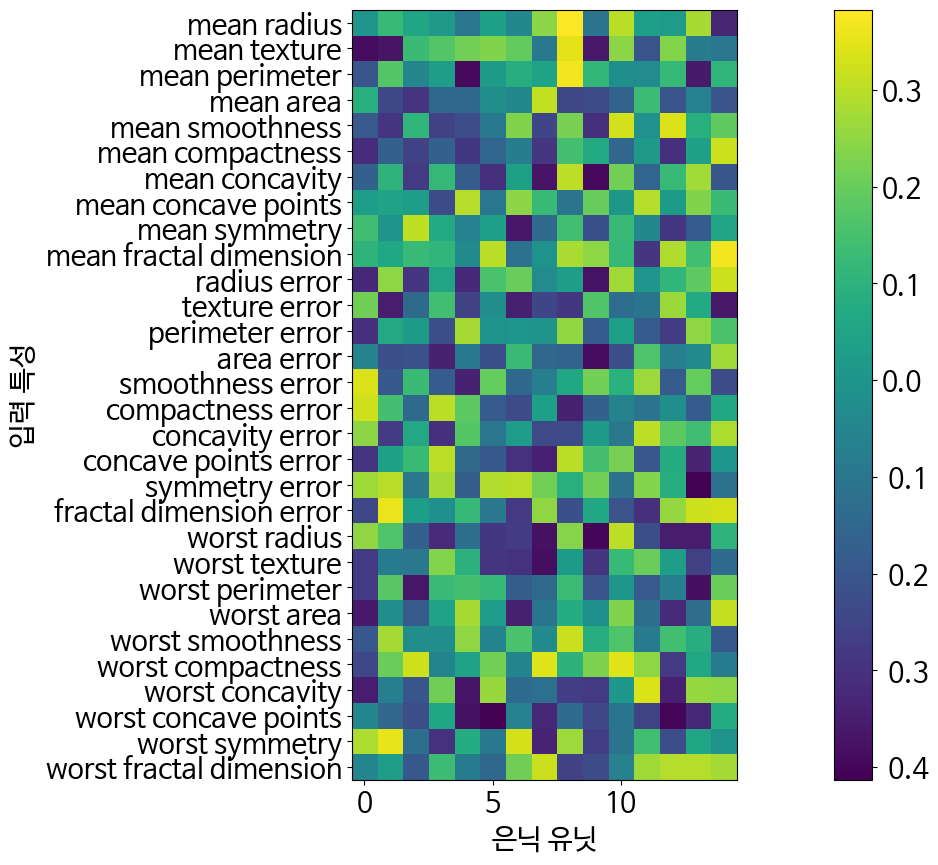

In [47]:
# 데이터 사이즤 426x30 (변수: 30개)
# 출력 0번 가중치 ( 30x15 )
plt.figure(figsize=(25, 10))  # 글씨가 훨씬 더 잘 보인답니다~
plt.imshow(mlp.coefs_[0], interpolation='none', cmap = 'viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()